# How to Handle the Categorical Missing data

There are few techniques to handle the Missing Categorical Varibles 

1. delete the rows (But here we are missing the dataset information which leads to high bias)

2. Fill NAN values with frequent categories(mode) (which leads to imbalanced dataset)

3. Apply Classifier Algorithms to predict

4. Apply Unsupervised ML algorithms

##### Frequent Categorical Imputation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
categorical_columns = []
for i in df.columns:
    if df[i].dtype == 'object' :
        categorical_columns.append(i)

In [7]:
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [8]:
df= pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [9]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [10]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [12]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

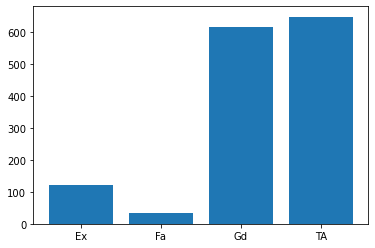

In [13]:
plt.bar(df.groupby(['BsmtQual']).size().index, df.groupby(['BsmtQual']).size().values)

<AxesSubplot:xlabel='BsmtQual'>

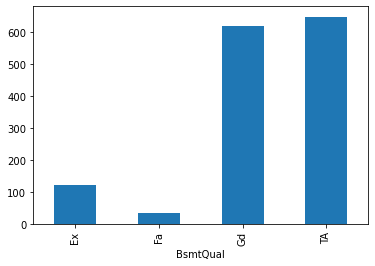

In [14]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

<AxesSubplot:xlabel='FireplaceQu'>

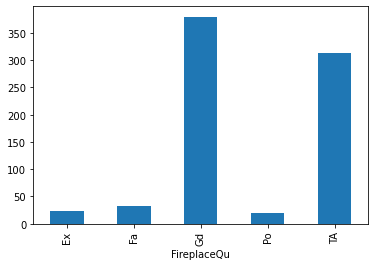

In [15]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().plot.bar()

<AxesSubplot:xlabel='GarageType'>

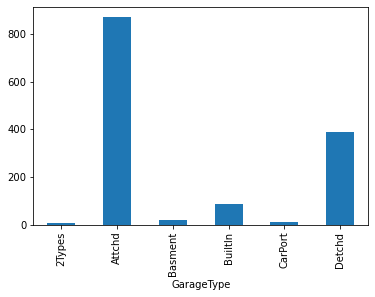

In [16]:
df.groupby(['GarageType'])['GarageType'].count().plot.bar()

In [17]:
def impute_nan_cat(dataframe, variable):
    dataframe[variable].fillna(value = dataframe[variable].mode()[0], inplace = True) 

In [18]:
for i in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan_cat(df, i)

In [19]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Gd,Attchd,142125


### Advantages
* Easy and Faster way to implement

### Disadvantages
* Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
* It distorts the relation of the most frequent label

### Adding a variable to capture NAN

In [20]:
df= pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [22]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [23]:
import numpy as np

In [24]:
df['FireplaceQu' + '_nan'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)

In [25]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_nan
0,Gd,Gd,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,Gd,Attchd,142125,1


In [26]:
df['GarageType' + '_nan'] = np.where(df['GarageType'].isnull(), 1, 0)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)

In [27]:
df['BsmtQual' + '_nan'] = np.where(df['BsmtQual'].isnull(), 1, 0)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)

In [28]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_nan,GarageType_nan,BsmtQual_nan
0,Gd,Gd,Attchd,208500,1,0,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0,0
1456,Gd,TA,Attchd,210000,0,0,0
1457,TA,Gd,Attchd,266500,0,0,0
1458,TA,Gd,Attchd,142125,1,0,0


Suppose if you have more frequent categories, we just replace NAN with a new category

In [29]:
df= pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [30]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [31]:
def impute_cat(dataframe, variable):
    dataframe[variable + '_new_var'] = np.where(dataframe[variable].isnull(), "Missing", dataframe[variable])

In [32]:
for i in ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice']:
    impute_cat(df, i)

In [33]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var,SalePrice_new_var
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000
...,...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125,TA,Missing,Attchd,142125


In [34]:
df = df.drop(columns = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], axis = 1)

In [35]:
df

,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var,SalePrice_new_var
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Missing,Attchd,142125
